# Automated Treatment Planning via Bayesian Optimization

This tutorial shows how to use the Sparse Axis-Aligned Subspace Bayesian Optimization (SAASBO) method [1] for automated treatment planning. The tutorial here includes, setup search space and constraints, settings of model and forms of results.

[1] D. Eriksson, M. Jankowiak. High-Dimensional Bayesian Optimization with Sparse Axis-Aligned Subspaces. Proceedings of the Thirty-Seventh Conference on Uncertainty in Artificial Intelligence, 2021.

In [15]:
try:  
  !jupyter nbconvert --to python tutorial_for_BOPlanner.ipynb
except:
  pass

[NbConvertApp] Converting notebook tutorial_for_BOPlanner.ipynb to python
[NbConvertApp] Writing 2898 bytes to tutorial_for_BOPlanner.py


In [2]:
import pandas as pd
from main import main
import os

## Setup search space and constraints

## A. Planning parameters

In order to reduce the optimization time, only 16 planning parameters are adjusted.

In [5]:
obj_fn = "./config/prescriptions/Rectum/16D.csv"
obj_df = pd.read_csv(obj_fn)
obj_df

,Structure,Type,limit,Volume,DoseLimit,Priority,LimitType
0,BODY_D000,Point,upper,0.0,53.13,1000,D
1,CTV_D100,Point,lower,100.0,"[41.8,43.89]","[100,1000]",D
2,PTV_D100,Point,lower,100.0,"[41.8,43.89]","[100,1000]",D
3,PGTVp_D100,Point,lower,100.0,"[50.6,53.13]","[100,1000]",D
4,GTVp_D100,Point,lower,100.0,"[50.6,53.13]","[100,1000]",D
5,Irrad Volume_D000,Point,upper,0.0,45,300,D
6,Irrad Volume_D100,Point,lower,100.0,41.8,300,D
7,Avoidance_D000,Point,upper,0.0,40,250,D
8,Avoidance_Mean,Mean,upper,NaN,15,250,D
9,FemoralHead_Mean,Mean,upper,NaN,"[1,15]","[100,1000]",D


## B. Constraints

Constraints on adjustable planning parameters.

In [8]:
const_fn = "./config/prescriptions/Rectum/rectum_constraint16D.txt"
const_txt = pd.read_csv(const_fn,names=['constraints'])
pd.set_option("display.max_columns",None)
const_txt

,constraints
0,PTV_D100_DoseLimit <= CTV_D100_DoseLimit
1,FemoralHead_Mean_DoseLimit <= FemoralHead_D000...
2,Urinary_Bladder_Mean_DoseLimit <= Urinary_Blad...


## Run SAAS-BO

`model_select` can choose the optimization model named `FULLYBAYESIAN`, `GPEI` or `SOBOL`. 

* `FULLYBAYESIAN`: Sparse Axis Aligned Subspace Bayesian Optimization
* `GPEI`: Standard Bayesian Optimization
* `SOBOL`: A Random-sampling Method

In [7]:
with open("./config/pat_names.txt", "r") as buf:
     pat_list = list(buf.readline().strip().split(" "))

In [ ]:
for pa in pat_list:
    main(n_init=10,    # initial evaluation budget
         n_batch=10,    # number of trials for Bayesian optimization
         patient_id=pa, 
         plan_id="saasbo", 
         model_select='FULLYBAYESIAN', 
         obj_fn="./config/prescriptions/Rectum/16D.csv",    # planning parameters
         const_fn = "./config/prescriptions/Rectum/rectum_constraint16D.txt",    # constraints
         opt_dir="/util_saas/",    # results storage address
         dvh_dir="/dvh_saas/")    # dvh storage address

## Results

## A. Planning parameters and corresponding PQM score

The last two rows of data are generated by re-optimization and dose calculation with the best planning parameters.

In [10]:
pars_fn = './opt_res/' + pa + '/util_saas/pars.csv'
pars_df = pd.read_csv(pars_fn)
pars_df

,"CTV_D100_Point_lower_Volume 100.0_DoseLimit_Priority [100.0, 1000.0]","CTV_D100_Point_lower_Volume 100.0_DoseLimit [41.8, 43.89]_Priority","PTV_D100_Point_lower_Volume 100.0_DoseLimit_Priority [100.0, 1000.0]","PTV_D100_Point_lower_Volume 100.0_DoseLimit [41.8, 43.89]_Priority","PGTVp_D100_Point_lower_Volume 100.0_DoseLimit_Priority [100.0, 1000.0]","PGTVp_D100_Point_lower_Volume 100.0_DoseLimit [50.6, 53.13]_Priority","GTVp_D100_Point_lower_Volume 100.0_DoseLimit_Priority [100.0, 1000.0]","GTVp_D100_Point_lower_Volume 100.0_DoseLimit [50.6, 53.13]_Priority","FemoralHead_Mean_Mean_upper_Volume nan_DoseLimit_Priority [100.0, 1000.0]","FemoralHead_Mean_Mean_upper_Volume nan_DoseLimit [1.0, 15.0]_Priority","FemoralHead_D000_Point_upper_Volume 0.0_DoseLimit_Priority [100.0, 1000.0]","FemoralHead_D000_Point_upper_Volume 0.0_DoseLimit [1.0, 50.0]_Priority","Urinary Bladder_Mean_Mean_upper_Volume nan_DoseLimit_Priority [100.0, 1000.0]","Urinary Bladder_Mean_Mean_upper_Volume nan_DoseLimit [1.0, 20.0]_Priority","Urinary Bladder_D000_Point_upper_Volume 0.0_DoseLimit_Priority [100.0, 1000.0]","Urinary Bladder_D000_Point_upper_Volume 0.0_DoseLimit [1.0, 50.0]_Priority",Utility
0,43.539974,911.537779,42.288100,794.926405,52.119334,939.142737,52.144628,556.002334,5.257180,290.076945,39.959637,922.792976,3.421682,406.468888,9.850382,858.250305,-6.562626
1,43.467830,333.233894,42.932203,678.521694,51.204255,820.596856,51.167204,850.608065,1.413706,798.985595,41.336958,882.821502,9.345123,717.074960,45.723137,156.773503,1.446299
2,42.479784,554.779198,42.154876,256.495508,52.217299,379.114903,52.649660,212.245018,9.499452,175.201516,16.770857,394.295103,13.828850,337.417701,15.728411,774.652891,-11.203652
3,43.305437,798.881448,42.561747,403.258025,51.422999,558.575168,51.905055,634.886557,5.410925,745.010279,37.138962,694.632396,17.672591,131.434538,32.825529,814.075016,-1.595826
4,42.705207,542.699851,42.697178,185.869663,51.876451,272.331243,50.829152,965.369521,3.740360,555.934721,45.644596,515.120572,7.512075,247.842487,22.803427,601.022037,-5.313365
5,43.774984,771.154517,43.467415,607.593852,50.912893,727.868806,52.825417,311.963801,10.565129,388.373357,21.270173,982.566952,11.323163,796.144601,41.719033,216.948177,2.056620
6,43.832862,494.413576,42.092830,327.314090,52.808356,496.950501,52.487984,996.429620,9.179761,655.306217,20.108208,612.706666,4.005548,996.358349,13.287257,937.827543,-13.180536
7,43.405359,593.948322,42.627036,508.800462,53.109968,151.104260,51.620549,181.616647,4.330279,132.080765,42.450980,734.459320,16.667446,632.444224,24.957518,884.716279,-7.966679
8,43.610681,240.649587,43.532136,175.196581,51.483331,257.345519,52.521439,335.597271,7.490166,978.499639,38.079944,552.929202,10.780828,493.214598,36.733704,186.974774,0.435043
9,43.187078,706.838780,41.830936,914.521042,51.143697,445.542478,51.855313,151.518534,2.836697,579.124111,34.647854,969.647773,2.418282,805.541769,47.956414,787.387649,-4.048332


## B. Lengthscales

In [11]:
hyperpars_fn = './opt_res/' + pa + '/util_saas/hyperpars.csv'
hyperpars_df = pd.read_csv(hyperpars_fn)
hyperpars_df

,"CTV_D100_Point_lower_Volume 100.0_DoseLimit_Priority [100.0, 1000.0]","CTV_D100_Point_lower_Volume 100.0_DoseLimit [41.8, 43.89]_Priority","PTV_D100_Point_lower_Volume 100.0_DoseLimit_Priority [100.0, 1000.0]","PTV_D100_Point_lower_Volume 100.0_DoseLimit [41.8, 43.89]_Priority","PGTVp_D100_Point_lower_Volume 100.0_DoseLimit_Priority [100.0, 1000.0]","PGTVp_D100_Point_lower_Volume 100.0_DoseLimit [50.6, 53.13]_Priority","GTVp_D100_Point_lower_Volume 100.0_DoseLimit_Priority [100.0, 1000.0]","GTVp_D100_Point_lower_Volume 100.0_DoseLimit [50.6, 53.13]_Priority","FemoralHead_Mean_Mean_upper_Volume nan_DoseLimit_Priority [100.0, 1000.0]","FemoralHead_Mean_Mean_upper_Volume nan_DoseLimit [1.0, 15.0]_Priority","FemoralHead_D000_Point_upper_Volume 0.0_DoseLimit_Priority [100.0, 1000.0]","FemoralHead_D000_Point_upper_Volume 0.0_DoseLimit [1.0, 50.0]_Priority","Urinary Bladder_Mean_Mean_upper_Volume nan_DoseLimit_Priority [100.0, 1000.0]","Urinary Bladder_Mean_Mean_upper_Volume nan_DoseLimit [1.0, 20.0]_Priority","Urinary Bladder_D000_Point_upper_Volume 0.0_DoseLimit_Priority [100.0, 1000.0]","Urinary Bladder_D000_Point_upper_Volume 0.0_DoseLimit [1.0, 50.0]_Priority"
0,4.446352,6.947049,4.003408,4.200747,4.541566,7.158067,5.636553,6.459146,5.623831,4.969371,4.478402,5.060094,4.334120,4.102754,5.296275,3.791066
1,4.939051,2.980117,1.839635,4.283242,2.260180,4.219960,4.484421,5.478288,4.953332,6.115650,4.125011,3.502970,4.627071,4.935019,3.120158,5.457462
2,4.560923,2.620427,1.550795,3.332033,1.478582,3.164970,3.953762,4.776908,3.009414,3.815682,2.223813,3.465705,2.786320,3.283956,3.851613,2.734311
3,1.919553,3.358171,2.496826,2.663770,1.200151,2.403802,4.123905,2.051950,3.265203,5.185922,2.719737,3.315663,2.361766,3.740366,1.064594,2.588599
4,2.806294,3.072116,2.342700,2.211444,2.556887,1.778224,2.425366,3.271219,2.058145,4.671538,3.037007,2.340864,4.401032,3.614092,1.261402,1.475713
5,3.534657,2.502305,3.980005,2.529048,0.948536,3.023613,3.289948,3.046501,3.331307,3.165454,2.564269,3.694094,3.440653,3.637980,1.924609,1.373292
6,3.546288,2.889122,2.646143,3.392885,2.215150,2.899852,4.186229,3.977899,3.245007,3.572236,3.741957,4.895242,2.502311,2.299072,1.249903,1.792981
7,2.477855,1.582088,4.752702,3.633175,3.813077,2.959408,4.084960,4.111921,3.399631,4.493339,2.466027,4.581919,2.235448,4.825579,0.458629,1.532468
8,3.480893,3.055634,4.727538,3.525214,4.019857,1.994182,4.567290,3.741141,3.618349,4.847308,3.477594,5.825095,2.301809,4.290266,0.659174,1.341843
9,4.969970,1.675626,4.391098,2.872823,3.627083,3.849890,3.788951,4.025296,3.542494,6.957670,4.980645,4.831002,2.718300,3.821848,0.927855,1.058590


## C. Optimal DVH

In [7]:
from results.DVH import sketchDVH
import matplotlib; matplotlib.use('nbAgg')

<IPython.core.display.Javascript object>


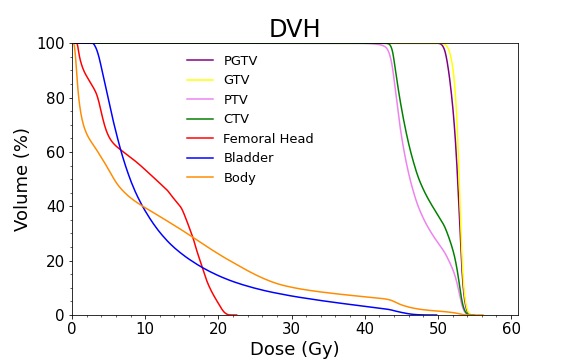

In [8]:
dvhpath = './opt_res/' + pa + '/dvh_saas/'
dvh_path = os.listdir(dvhpath)
for d in dvh_path:
    if d.split("_")[-1][-8:] == 'cal2.csv':
        dvh_fl = dvhpath + d

DVH_items = ['PGTV', 'GTV', 'PTV', 'CTV', 'Femoral Head', 'Bladder', 'Body']
sketchDVH(dvh_fl, DVH_items)